In [7]:
!pip3 install torch torchvision torchaudio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.5/139.5 MB 11.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 15.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 15.5 MB/s eta 0:00:0000:0100:01
  Using cached filelock-3.12.0-py3-none-any.whl (10 kB)
  Using cached sympy-1.11.1-py3-none-any.whl (6.5 MB)
  Using cached networkx-3.1-py3-none-any.whl (2.1 MB)
  Using cached Jinja2-3.1.2-py3-none-any.whl (133 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.8/19.8 MB 29.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 26.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.7/123.7 kB 4.5 MB/s eta 0:00:00
  Using cached idna-3.4-py3-none-any.whl (61 kB)
  Using cached urllib3-1.26.15-py2.py3-none-any.whl (140 kB)
  Using cached certifi-2022.12.7-py3-none-any.whl (155 kB)
  U

In [1]:
!pip install img2vec_pytorch

In [2]:
import torch

import numpy as np
import pandas as pd
import os

In [3]:
metadata = pd.read_csv('../Project_Data/Metadata.csv')
metadata.sample(2)

,Unnamed: 0,category,tech1,description,fit,title,also_buy,image,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price,asin
5460,27117,"['Clothing, Shoes & Jewelry', 'Women', 'Clothi...",NaN,['The ultimate pants for everything you do: th...,"class=""a-normal a-align-center a-spacing-smal...",Under Armour Women's ColdGear Infrared EVO Moc...,"['B01B3HHCH2', 'B00U9BL6ZI', 'B019YPUD08', 'B0...",['https://images-na.ssl-images-amazon.com/imag...,NaN,Under Armour,"['100% Other Fibers', 'Imported', 'The ultimat...","213,191 in Sports & Outdoors (","['B00U9BL6ZI', 'B019YPUCXQ', 'B019YJJBM0', 'B0...","{'\n Item Weight: \n ': '1 pounds', 'Shi...",Sports & Outdoors,NaN,NaN,$44.97 - $119.91,B00DQ3G7UA
3307,71832,"['Clothing, Shoes & Jewelry', 'Women', 'Shoes'...",NaN,['Peep toe sandal with elastic and stacked hee...,"class=""a-normal a-align-center a-spacing-smal...",Vince Camuto Women's Eliaz Dress Sandal,"['B075FQZ89P', 'B01M0ZMUPR', 'B01M0O0KGX', 'B0...",['https://images-na.ssl-images-amazon.com/imag...,NaN,NaN,"['Leather', 'Imported', 'Synthetic sole', 'Sha...","550,553 in Clothing, Shoes & Jewelry (","['B078T4JLZZ', 'B075FQZ89P', 'B0771RG9LG', 'B0...",{},"<img src=""https://images-na.ssl-images-amazon....",NaN,"<div class=""a-fixed-left-grid a-spacing-none"">...",$50.73 - $123.28,B017UW43G2


In [31]:
from img2vec_pytorch import Img2Vec
from PIL import Image

def get_vec(img_filename):
    # Initialize Img2Vec with GPU
    img2vec = Img2Vec(cuda=True, model='resnet-18', layer_output_size=512)

    # Read in an image (rgb format)
    img = Image.open(img_filename)
    # Get a vector from img2vec, returned as a torch FloatTensor
    vec = img2vec.get_vec(img, tensor=True)
    # Or submit a list
    # vectors = img2vec.get_vec(list_of_PIL_images)

    return vec


In [60]:
import glob
from tqdm import tqdm 

image_list = glob.glob("../Project_Data/Images/*")

image_vector_dict = {}
n_fails = 0
for img_name in tqdm(image_list):
    try:
        image_vector_dict[img_name.split('\\')[1]] = get_vec(img_name).squeeze()
    except:
        n_fails += 1
        continue
print("Task completed. No of failures = {}".format(n_fails))

  0%|          | 0/41706 [00:00<?, ?it/s]d:\Softwares\Installed\Anaconda\envs\isr_project\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
d:\Softwares\Installed\Anaconda\envs\isr_project\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
100%|██████████| 41706/41706 [3:17:09<00:00,  3.53it/s]  

Task completed. No of failures = 2425


In [62]:
import pickle
with open('../Output/image_vector_dict.pickle','wb') as file:
    pickle.dump(image_vector_dict, file, protocol = pickle.HIGHEST_PROTOCOL)

In [64]:
image_vector_dict['B000072UMA_0.jpg'].shape

torch.Size([512])

In [154]:
print("Task completed. No of failures = {}".format(n_fails))

Task completed. No of failures = 2425


In [ ]:
asin_ind_mapping = {}
for ind, row in metadata.iterrows():
    asin_ind_mapping[row['asin']] = ind

In [77]:
image_vector_dict[asin_images[0]].numpy().shape

(512,)

In [105]:
np.array(lst).mean(axis=0).shape

(512,)

In [110]:
len(image_vector_dict.keys())

39281

In [111]:
product_image_vector = np.zeros((metadata.shape[0], 512))
fail_counter = 0
for asin in tqdm(metadata.asin):
    asin_images = glob.glob("../Project_Data/Images/"+str(asin)+"_*")
    # try:
    asin_images = [path.split('\\')[1] for path in asin_images]

    lst = []
    for i in asin_images:
        try:
            lst.append(image_vector_dict[i].numpy().T)
        except Exception as e:
            # print(e)
            fail_counter += 1 
            if fail_counter%100==0:
                print(fail_counter)
            continue
    product_image_vector[asin_ind_mapping[asin]] = np.array(lst).mean(axis=0)
    # product_image_vector[asin_ind_mapping[asin]] = np.array([image_vector_dict[i].numpy() for i in asin_images]).T.mean(axis=1)
    # except:
    #     continue

  2%|▏         | 94/5576 [00:07<07:02, 12.98it/s]C:\Users\Hari\AppData\Local\Temp\ipykernel_27252\874061264.py:18: RuntimeWarning: Mean of empty slice.
  product_image_vector[asin_ind_mapping[asin]] = np.array(lst).mean(axis=0)
d:\Softwares\Installed\Anaconda\envs\isr_project\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
  3%|▎         | 142/5576 [00:11<07:04, 12.80it/s]

100


  6%|▌         | 328/5576 [00:26<06:45, 12.94it/s]

200


 10%|▉         | 542/5576 [00:43<06:34, 12.76it/s]

300


 12%|█▏        | 666/5576 [00:52<06:27, 12.66it/s]

400


 15%|█▌        | 846/5576 [01:06<06:00, 13.11it/s]

500


 18%|█▊        | 982/5576 [01:17<05:58, 12.81it/s]

600


 22%|██▏       | 1208/5576 [01:34<05:36, 12.98it/s]

700


 27%|██▋       | 1482/5576 [01:55<05:12, 13.09it/s]

800


 31%|███       | 1706/5576 [02:12<04:52, 13.25it/s]

900


 33%|███▎      | 1852/5576 [02:23<04:40, 13.30it/s]

1000


 39%|███▉      | 2190/5576 [02:49<04:15, 13.25it/s]

1100


 44%|████▍     | 2460/5576 [03:09<03:53, 13.34it/s]

1200


 48%|████▊     | 2650/5576 [03:24<03:50, 12.71it/s]

1300


 54%|█████▍    | 3000/5576 [03:52<03:10, 13.53it/s]

1400


 56%|█████▌    | 3124/5576 [04:02<03:54, 10.47it/s]

1500


 62%|██████▏   | 3440/5576 [04:28<02:58, 11.98it/s]

1600


 66%|██████▌   | 3658/5576 [04:45<02:36, 12.22it/s]

1700


 69%|██████▉   | 3852/5576 [05:00<02:14, 12.85it/s]

1800


 74%|███████▎  | 4100/5576 [05:19<02:02, 12.03it/s]

1900


 79%|███████▉  | 4402/5576 [05:43<01:29, 13.14it/s]

2000


 85%|████████▌ | 4756/5576 [06:10<01:02, 13.14it/s]

2100


 91%|█████████ | 5072/5576 [06:35<00:37, 13.28it/s]

2200


 96%|█████████▌| 5364/5576 [06:57<00:16, 13.14it/s]

2300


 98%|█████████▊| 5468/5576 [07:05<00:08, 13.02it/s]

2400


100%|██████████| 5576/5576 [07:13<00:00, 12.85it/s]


In [125]:
n_prods = metadata.shape[0]

def cosine_similarity(vec1, vec2):
    return np.dot(vec1,vec2)/ (np.linalg.norm(vec1)*np.linalg.norm(vec2))

product_img_similarity_matrix = np.zeros((n_prods, n_prods))
for i in tqdm(range(n_prods)):
    for j in range(n_prods):
        product_img_similarity_matrix[i][j] = cosine_similarity(product_image_vector[i], product_image_vector[j])

  0%|          | 0/5576 [00:00<?, ?it/s]C:\Users\Hari\AppData\Local\Temp\ipykernel_27252\2404177180.py:4: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(vec1,vec2)/ (np.linalg.norm(vec1)*np.linalg.norm(vec2))
100%|██████████| 5576/5576 [04:38<00:00, 20.01it/s]


In [206]:
ind

5575

In [209]:
product_img_similarity_matrix_copy = ç.copy()

In [210]:
product_img_similarity_matrix_nan_replaced = np.nan_to_num(product_img_similarity_matrix, nan=0)

In [213]:
product_img_similarity_matrix

array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       ...,
       [       nan,        nan,        nan, ..., 1.        , 0.67594021,
        0.68676536],
       [       nan,        nan,        nan, ..., 0.67594021, 1.        ,
        0.83222109],
       [       nan,        nan,        nan, ..., 0.68676536, 0.83222109,
        1.        ]])

In [212]:
product_img_similarity_matrix

array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       ...,
       [       nan,        nan,        nan, ..., 1.        , 0.67594021,
        0.68676536],
       [       nan,        nan,        nan, ..., 0.67594021, 1.        ,
        0.83222109],
       [       nan,        nan,        nan, ..., 0.68676536, 0.83222109,
        1.        ]])

In [ ]:
top_product_dict['']

In [215]:
get_top_n_indices(product_img_similarity_matrix[ind], 10)

array([   0, 3509, 3610, 3608, 3590, 3569, 3540, 3514, 3512, 3498],
      dtype=int64)

In [255]:
metadata['asin'].iloc[820]

'B00HOVUXRI'

In [219]:
def get_top_n_indices(array, top_n):
    return array.argsort()[-top_n:][::-1]

top_n = 10
top_product_dict = {}
for ind, vec in tqdm(enumerate(product_img_similarity_matrix_nan_replaced)):
    if ((np.isnan(product_img_similarity_matrix[ind]).sum() == 5576) or 
        (product_img_similarity_matrix[ind].sum()==0)) :
        top_product_dict[metadata['asin'].iloc[ind]] = 0
    
    else:
        top_product_dict[metadata['asin'].iloc[ind]] = metadata['asin'].iloc[get_top_n_indices(vec, top_n+1)[1:]].to_list()

top_product_dict

5576it [00:02, 2183.59it/s]


{'B000072US4': ['B000089V5B',
  'B00008KZCG',
  'B00VQNQEAU',
  'B00GKOMC3S',
  'B0001Y8YBW',
  'B00E7WU63I',
  'B011JIUIW6',
  'B007PBF3B8',
  'B0002MD73I',
  'B01BW3201K'],
 'B000074RL3': ['B00P6P9E60',
  'B01DK53UXK',
  'B005JSF2DS',
  'B00QQYNUOC',
  'B00QQYP0IG',
  'B01AD1H0GM',
  'B01DW3PFOM',
  'B00KCXBYZA',
  'B00AP7SQIQ',
  'B00M28TKD6'],
 'B000072UMA': ['B00DST3T2G',
  'B005IB2DOW',
  'B006JBV8DC',
  'B000VC4I50',
  'B007PBF3B8',
  'B005MILBA8',
  'B0002MD73I',
  'B01DQ7AGVG',
  'B00CHVV27U',
  'B00E7WU63I'],
 'B00007KQBV': ['B000LWEOTK',
  'B018YBDIBE',
  'B00VRDVE9U',
  'B018B4YOYY',
  'B00OK2ETAG',
  'B014NC91WS',
  'B007P4V0O4',
  'B00QMT9TP0',
  'B00N6HNLIW',
  'B003CIYY5Y'],
 'B000087VAL': ['B000E142PO',
  'B0059L9QJG',
  'B005BI792I',
  'B001TDKY8U',
  'B00SJUGSMW',
  'B00KM8GUS6',
  'B001AWUYM6',
  'B00VQU5IKA',
  'B0007T37UY',
  'B000H16HWW'],
 'B0000891KM': ['B002YQ2GDM',
  'B00JWVH3V2',
  'B001GDGTGO',
  'B00LVNVN42',
  'B00ISCUF0M',
  'B004AK3SMI',
  'B007V039FU',

In [262]:
with open('Image_similar_items_dic.pickle','wb') as file:
    pickle.dump(top_product_dict, file, protocol=pickle.HIGHEST_PROTOCOL)

In [264]:
from matplotlib.pyplot import imshow

def get_all_images_for_asin(asin:str):
    img_list = glob.glob("../Project_Data/Images/"+str(asin)+'*')
    return img_list
    # print(img_list)

def get_similar_images(org_asin:str):
    org_img_list = get_all_images_for_asin(org_asin)
    similar_products = top_product_dict[org_asin]
    print("Original Image")
    # for img in org_img_list[:4]:
    #     try:
    #         display(Image.open(img))
    #     except:
    #         continue

    for ind, sim_prod_asin in enumerate(similar_products[:3]):
        sim_prod_img_list = get_all_images_for_asin(sim_prod_asin)
        print("Similar Product #{}".format(ind))
        print(sim_prod_asin)
        # for img in sim_prod_img_list[:3]:
        #     try:
        #         display(Image.open(img))
        #     except:
        #         continue


get_similar_images('B0027WH4YO')

Original Image
Similar Product #0
B00GCCN6MO
Similar Product #1
B00AZGMV3S
Similar Product #2
B001GW1G5E


Original Image


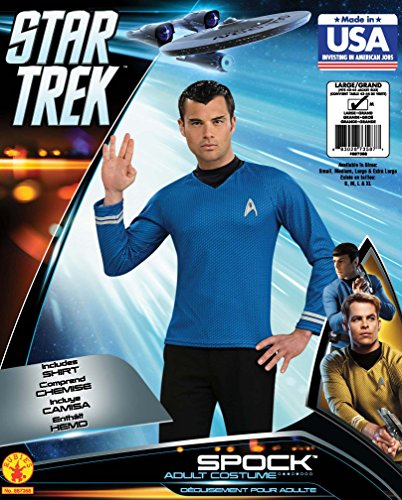

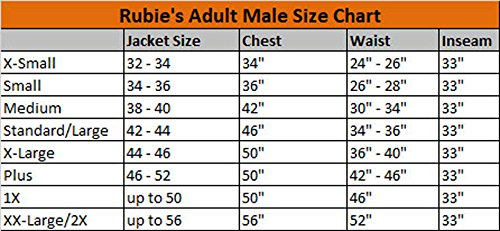

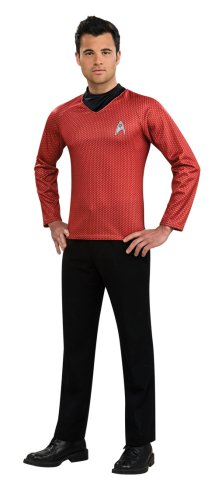

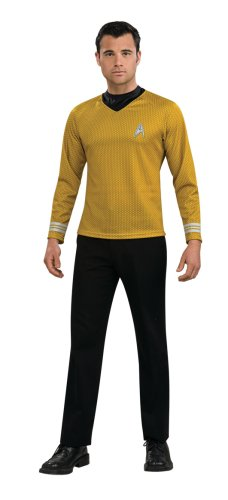

Similar Product #0


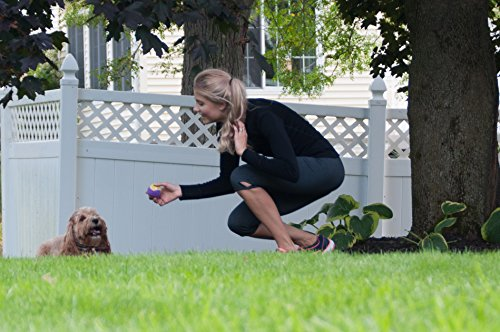

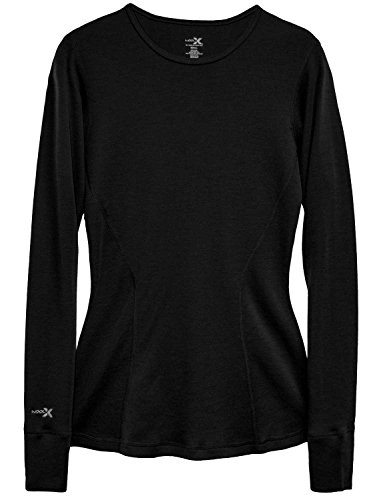

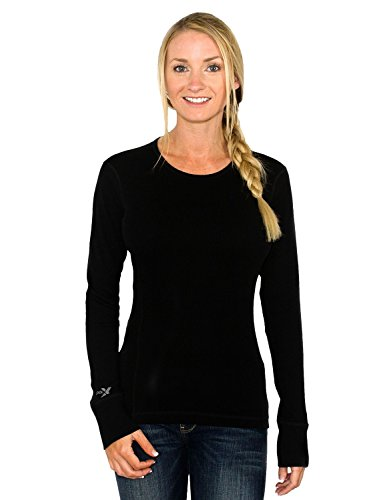

Similar Product #1


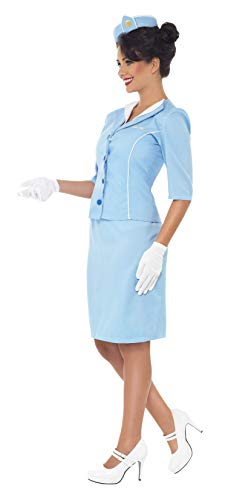

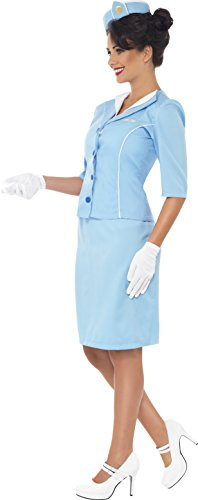

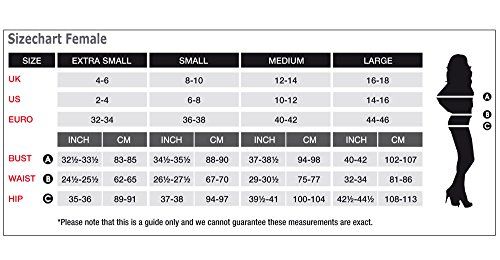

Similar Product #2


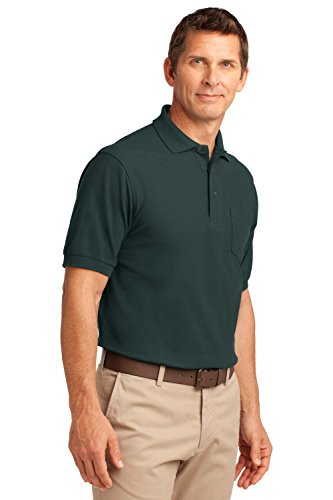

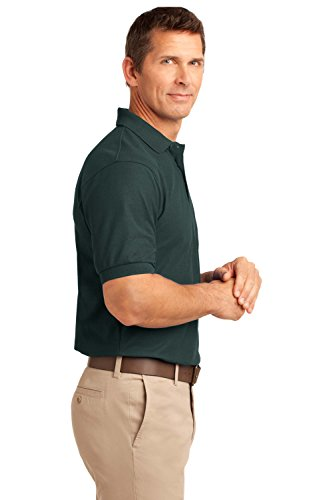

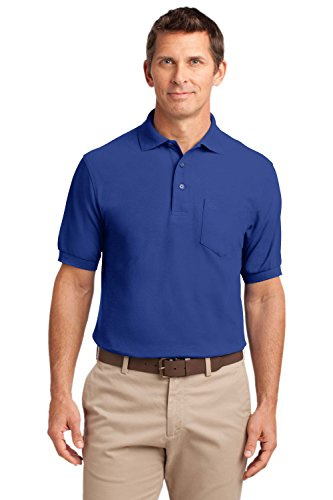

In [261]:
get_similar_images('B0027WH4YO')

Original Image


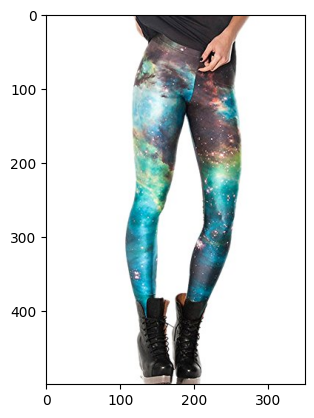

In [240]:
get_similar_images('B00JDNLCRA')

In [269]:
glob.glob("../Project_Data/Images/B004BOU5TM*")
Image.open('../Project_Data/Images\\B004BOU5TM_3.jpg')

UnidentifiedImageError: cannot identify image file '../Project_Data/Images\\B004BOU5TM_3.jpg'

In [271]:
asins = metadata['asin'].to_list()
image_ind = {}
for asin in asins:
    try:
        Image.open('../Project_Data/Images/'+ str(asin)+ '_0.jpg')
        image_ind[asin] = True
    except:
        image_ind[asin] = False

In [276]:
with open('../Output/Image_ind_v1.pickle', 'wb') as file:
    pickle.dump(image_ind, file, protocol=pickle.HIGHEST_PROTOCOL)

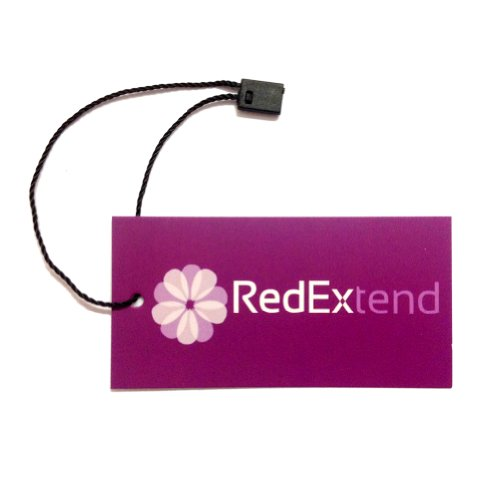

In [233]:
Image.open(get_all_images_for_asin('B00JDNLCRA')[0])

In [193]:
top_product_dict['B00HGREHU4']

array([511, 510, 161, 162, 163, 164, 165, 166, 167, 168], dtype=int64)

In [157]:
np.argwhere(product_image_vector.sum(axis=1)==0)
np.argwhere(np.isnan(product_image_vector.sum(axis=1))).shape

(275, 1)

In [189]:
np.isnan(product_img_similarity_matrix[0]).sum()

5576

In [142]:
cosine_similarity(product_image_vector[-1], product_image_vector[30])

C:\Users\Hari\AppData\Local\Temp\ipykernel_27252\2404177180.py:4: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(vec1,vec2)/ (np.linalg.norm(vec1)*np.linalg.norm(vec2))


nan

In [165]:
# product_image_vector[664]
asin_of_missing_product_image= metadata['asin'].iloc[800]
image_vector_dict[asin_of_missing_product_image+'_1.jpg']

KeyError: 'B00HGREHU4_1.jpg'

In [ ]:
metadata_

In [166]:
get_vec('../Project_Data/Images/'+asin_of_missing_product_image+'_0.jpg')

UnidentifiedImageError: cannot identify image file '../Project_Data/Images/B00HGREHU4_0.jpg'

In [153]:
product_image_vector[664]

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na

In [143]:
np.argwhere(np.isnan(product_img_similarity_matrix[-1]))

array([[   0],
       [   1],
       [   2],
       [   3],
       [   4],
       [   5],
       [   6],
       [   7],
       [   8],
       [   9],
       [  10],
       [  11],
       [  12],
       [  13],
       [  14],
       [  15],
       [  16],
       [  17],
       [  18],
       [  19],
       [  20],
       [  21],
       [  22],
       [  23],
       [  24],
       [  25],
       [  26],
       [  27],
       [  28],
       [  29],
       [  30],
       [  31],
       [  32],
       [  95],
       [ 102],
       [ 144],
       [ 177],
       [ 179],
       [ 184],
       [ 408],
       [ 436],
       [ 482],
       [ 503],
       [ 544],
       [ 573],
       [ 593],
       [ 594],
       [ 663],
       [ 664],
       [ 744],
       [ 752],
       [ 765],
       [ 776],
       [ 791],
       [ 799],
       [ 800],
       [ 802],
       [ 808],
       [ 819],
       [ 840],
       [ 854],
       [ 858],
       [ 859],
       [ 906],
       [ 934],
       [ 937],
       [ 9

In [170]:
mdata_w_url = pd.read_csv('../Project_Data/Metadata_w_urls.csv', index_col=0)

In [182]:
# B00HGREHU4_0.jpg
missing_image_index = 2106
urls = mdata_w_url['imageURLHighRes'].iloc[missing_image_index]
print(urls)

['https://images-na.ssl-images-amazon.com/images/I/41flA1N3WQL.jpg']


In [180]:
mdata_w_url['asin'].iloc[missing_image_index]

'B003ZWO1JQ'

In [181]:
mdata_w_url.index[mdata_w_url['asin'] == 'B00HGREHU4'].tolist()

[2106]

In [179]:
import requests 

for url in eval(urls):
    extension =url.split('.')[-1]
    r = requests.get(url, allow_redirects=True)
    image_save_fname = asin + '_' + str(ind) +'.' + extension
    print(r.content)
    # open(os.path.join(IMAGE_FOLDER_HR,image_save_fname), 'wb').write(r.content)

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x05\x03\x04\x04\x04\x03\x05\x04\x04\x04\x05\x05\x05\x06\x07\x0c\x08\x07\x07\x07\x07\x0f\x0b\x0b\t\x0c\x11\x0f\x12\x12\x11\x0f\x11\x11\x13\x16\x1c\x17\x13\x14\x1a\x15\x11\x11\x18!\x18\x1a\x1d\x1d\x1f\x1f\x1f\x13\x17"$"\x1e$\x1c\x1e\x1f\x1e\xff\xdb\x00C\x01\x05\x05\x05\x07\x06\x07\x0e\x08\x08\x0e\x1e\x14\x11\x14\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\xff\xc0\x00\x11\x08\x01G\x01\xf4\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x1

In [37]:
from img2vec_pytorch import Img2Vec
from PIL import Image

def get_vec(img_filename):
    # Initialize Img2Vec with GPU
    img2vec = Img2Vec(cuda=True, model='resnet-18', layer_output_size=512)

    # Read in an image (rgb format)
    img = Image.open(img_filename)
    # Get a vector from img2vec, returned as a torch FloatTensor
    vec = img2vec.get_vec(img, tensor=True)
    # Or submit a list
    # vectors = img2vec.get_vec(list_of_PIL_images)

    return vec


'B000072UMA_0.jpg'

In [40]:
img2vec = Img2Vec(cuda=True, model='resnet-18', layer_output_size=512)
img = Image.open(image_list[0])
vec = img2vec.get_vec(img, tensor=True)

In [58]:
list_of_PIL_images = []
list_of_fnames = []

print("Creating PIL images")
for img_name in tqdm(image_list[:100]):
    try:
        img = Image.open(img_name)
        if img.layers != 3:
            continue
        list_of_PIL_images.append(img)
        list_of_fnames.append(img_name)
    except:
        continue
print("Done")
print("Size of PIL Images  : {}".format(len(list_of_PIL_images)))
print("Creating Vectors")
vectors = img2vec.get_vec(list_of_PIL_images)

Creating PIL images


100%|██████████| 100/100 [00:00<00:00, 4166.47it/s]

Done
Size of PIL Images  : 100
Creating Vectors


RuntimeError: The size of tensor a (919) must match the size of tensor b (100) at non-singleton dimension 0

3

In [51]:
dir(list_of_PIL_images[0])

['_Image__transformer',
 '__array_interface__',
 '__class__',
 '__copy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_category',
 '_close_exclusive_fp_after_loading',
 '_copy',
 '_crop',
 '_dump',
 '_ensure_mutable',
 '_exclusive_fp',
 '_exif',
 '_expand',
 '_get_safe_box',
 '_getexif',
 '_getmp',
 '_getxmp',
 '_min_frame',
 '_new',
 '_open',
 '_reload_exif',
 '_repr_png_',
 '_repr_pretty_',
 '_seek_check',
 '_size',
 'alpha_composite',
 'app',
 'applist',
 'apply_transparency',
 'bits',
 'close',
 'convert',
 'copy',
 'crop',
 'custom_mimetype',
 'decoderconfig',
 'decodermaxblock',
 'draft',
 'effe

In [49]:
len(list_of_PIL_images)

920